# Gyrator with coupler

The following S matrix describes an all pass 2- port network connecting two ports of a backward coupler to a reciprocal phaser

abs(P/Q) =  1.0


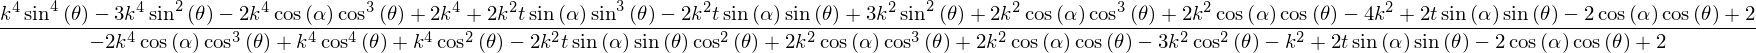

In [3]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from IPython.display import display, Math, Latex

init_printing()

k = Symbol('k', real=True)
alpha = Symbol('\\alpha', real=True)
theta = Symbol('\\theta', real=True)

S_1 = Symbol('S_1')
S_2 = Symbol('S_2')

Snet = EmNetwork()

S1_subs = I*k*sin(theta)/(sqrt(1-k**2)*cos(theta) + I*sin(theta))
S2_subs = sqrt(1-k**2)/(sqrt(1-k**2)*cos(theta) + I*sin(theta))

S_coupler = Matrix([[0, S_1, S_2, 0],
                    [S_1, 0, 0, S_2],
                    [S_2, 0, 0, S_1],
                    [0, S_2, S_1, 0]])
                 


S_phaser = Matrix([[0, exp(-I*alpha)],
                   [exp(-I*alpha), 0]])

Snet.addComponent(S_coupler, "coupler")
Snet.addComponent(S_phaser, "phaser")

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))


Snet.addConnection("coupler", 3, "phaser", 0)
Snet.addConnection("coupler", 1, "phaser", 1)

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))

S_21 = S[1,0]
display(Math('S_{21} = ' + latex(S_21)))

display(Math('S_1 = ' + latex(S1_subs)))
display(Math('S_2 = ' + latex(S2_subs)))


S_21 = S_21.subs([(S_1, S1_subs), (S_2, S2_subs)]).simplify()
display(Math('S_{21} = ' + latex(S_21)))

p = Wild('P')
q = Wild('Q')

pq = S_21.match(q/p)

display(Math('PQ = ' + latex(pq)))


p = (1/pq[p]).expand().trigsimp()
q = (1/pq[q]).expand().trigsimp()

display(Math('P = ' + latex(p)))
display(Math('Q = ' + latex(q)))

p_eval = complex(p.subs([(k,0.5), (alpha, pi/3.0), (theta, pi/4.0)]).evalf())
q_eval = complex(q.subs([(k,0.5), (alpha, pi/3.0), (theta, pi/4.0)]).evalf())
display(Math( 'P(k=0.5, \\alpha=\\pi/3.0, \\theta=\\pi/4) = {0}'.format(p_eval)))
display(Math( 'Q(k=0.5, \\alpha=\\pi/3.0, \\theta=\\pi/4) = {0}'.format(q_eval)))

print('abs(P/Q) = ', abs(complex(p_eval/q_eval)))

t = Symbol('t', real=True)
p = p.subs(sqrt(1-k**2), t)
abs_p = (re(p)**2 + im(p)**2).expand().subs(t**2, 1-k**2).trigsimp()
display(Math('abs(P)**2 = ' + latex(abs_p)))
q = q.subs(sqrt(1-k**2), t)
abs_q = (re(q)**2 + im(q)**2).expand().subs(t**2, 1-k**2).trigsimp()
display(Math('abs(Q)**2 = ' + latex(abs_q)))

simplify(abs_p/abs_q)

In [11]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from IPython.display import display, Math, Latex

init_printing()

k = Symbol('k', real=True)
alpha_1 = Symbol('\\alpha_1', real=True)
alpha_2 = Symbol('\\alpha_2', real=True)
theta = Symbol('\\theta', real=True)

S_1 = Symbol('S_1')
S_2 = Symbol('S_2')

Snet = EmNetwork()

S1_subs = I*k*sin(theta)/(sqrt(1-k**2)*cos(theta) + I*sin(theta))
S2_subs = sqrt(1-k**2)/(sqrt(1-k**2)*cos(theta) + I*sin(theta))

S_coupler = Matrix([[0, S_1, S_2, 0],
                    [S_1, 0, 0, S_2],
                    [S_2, 0, 0, S_1],
                    [0, S_2, S_1, 0]])

S_phaser = Matrix([[0, 0],
                   [exp(-I*alpha_1), exp(-I*alpha_2)]])


display(Math('S_\\text{coupler} = ' + latex(S_coupler)))
display(Math('S_\\text{phaser} = ' + latex(S_phaser)))

Snet.addComponent(S_coupler, "coupler")
Snet.addComponent(S_phaser, "phaser")

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))


Snet.addConnection("coupler", 3, "phaser", 0)
Snet.addConnection("coupler", 1, "phaser", 1)

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))

S_21 = S[1,0]
display(Math('S_{21} = ' + latex(S_21)))

S_12 = S[0,1]
display(Math('S_{12} = ' + latex(S_12)))


display(Math('S_1 = ' + latex(S1_subs)))
display(Math('S_2 = ' + latex(S2_subs)))


S_21 = S_21.subs([(S_1, S1_subs), (S_2, S2_subs)]).simplify()
display(Math('S_{21} = ' + latex(S_21)))

S_12 = S_12.subs([(S_1, S1_subs), (S_2, S2_subs)]).simplify()
display(Math('S_{12} = ' + latex(S_12)))


In [12]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from IPython.display import display, Math, Latex

init_printing()

k = Symbol('k', real=True)
alpha_1 = Symbol('\\alpha_1', real=True)
alpha_2 = Symbol('\\alpha_2', real=True)
theta = Symbol('\\theta', real=True)

S_1 = Symbol('S_1')
S_2 = Symbol('S_2')

Snet = EmNetwork()

S1_subs = I*k*sin(theta)/(sqrt(1-k**2)*cos(theta) + I*sin(theta))
S2_subs = sqrt(1-k**2)/(sqrt(1-k**2)*cos(theta) + I*sin(theta))

S_coupler = Matrix([[0, S_1, S_2, 0],
                    [S_1, 0, 0, S_2],
                    [S_2, 0, 0, S_1],
                    [0, S_2, S_1, 0]])

S_phaser = Matrix([[0, 1],
                   [-1,0]])

display(Math('S_\\text{coupler} = ' + latex(S_coupler)))
display(Math('S_\\text{phaser} = ' + latex(S_phaser)))


Snet.addComponent(S_coupler, "coupler")
Snet.addComponent(S_phaser, "phaser")

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))


Snet.addConnection("coupler", 3, "phaser", 0)
Snet.addConnection("coupler", 1, "phaser", 1)

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))

S_21 = S[1,0]
display(Math('S_{21} = ' + latex(S_21)))

S_12 = S[0,1]
display(Math('S_{12} = ' + latex(S_12)))


display(Math('S_1 = ' + latex(S1_subs)))
display(Math('S_2 = ' + latex(S2_subs)))


S_21 = S_21.subs([(S_1, S1_subs), (S_2, S2_subs)]).simplify()
display(Math('S_{21} = ' + latex(S_21)))

S_12 = S_12.subs([(S_1, S1_subs), (S_2, S2_subs)]).simplify()
display(Math('S_{12} = ' + latex(S_12)))
